# Workshop: Speech cognitive system

Course: Cognitive Systems

Website: https://www.iss.nus.edu.sg/executive-education/course/detail/cognitive--systems/artificial-intelligence

Contact: Tian Jing

email: tianjing@nus.edu.sg

## Objective

In this workshop, we will need to perform following task
- Build a HMM-based speech recognition system

## Reference

- An isolated word recognition. Prateek Joshi, Python Machine Learning Cookbook, Packt Publishing, 2016, Code available at https://github.com/PacktPublishing/Python-Machine-Learning-Cookbook

- A spoken DIGIT dataset, https://www.kaggle.com/divyanshu99/spoken-digit-dataset

## Submission guideline

Once you finish your workshop, rename your .ipynb file to your name, and submit your .ipynb file into LumiNUS.

# Import Libraries

In [1]:
# Installation (only for Google Colab)
!pip install python_speech_features==0.6 hmmlearn==0.2.1

     |████████████████████████████████| 150 kB 5.2 MB/s 
  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=8e2f5d3cfc7721b2634de76efaffaa0a1796f614cc9fe46745e13bf8e17e9b72
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
  Created wheel for hmmlearn: filename=hmmlearn-0.2.1-cp37-cp37m-linux_x86_64.whl size=358156 sha256=a5c7fbdb8e3db10b5ce9540ffeb658165c378d9a3e34bdcfd2f27113b1c9a3c2
  Stored in directory: /root/.cache/pip/wheels/18/dd/3d/bd306b50cf55ee60f0d30c7142e5cbac9c27c43dbe748a9f89
Successfully built python-speech-features hmmlearn


In [2]:
import numpy as np
from scipy.io import wavfile
from google.colab import drive
import os 
from hmmlearn import hmm
from python_speech_features import mfcc
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/iss/CGS')
!ls

Mounted at /content/gdrive
data


# Training

In [4]:
# Class to handle all HMM related processing
class HMMTrainer(object):
    def __init__(self, model_name='GaussianHMM', n_components=4, cov_type='diag', n_iter=1000):
        self.model_name = model_name
        self.n_components = n_components
        self.cov_type = cov_type
        self.n_iter = n_iter
        self.models = []

        # WRITE YOUR OWN CODE
        self.model = hmm.GaussianHMM(n_components=self.n_components, covariance_type=self.cov_type, n_iter=self.n_iter)

    # X is a 2D numpy array where each row is 13D
    def train(self, X):
        np.seterr(all='ignore')
        self.models.append(self.model.fit(X))

    # Run the model on input data
    def get_score(self, input_data):
        return self.model.score(input_data)
    
    def display_info(self):
        print("transmat_", self.model.transmat_)
        print("n_features", self.model.n_features)
        
    def predict_state(self, input_data):
        return self.model.predict(input_data)


In [5]:
# Build an HMM model
input_folder = "data"

hmm_models = []
# Parse the input directory
for dirname in os.listdir(input_folder):
    # Get the name of the subfolder 
    subfolder = input_folder + '/' + dirname

    # Extract the class label
    label = dirname

    # Initialize variables
    X = np.array([])
    y_words = []

    # Iterate through the audio files (leaving 1 file for testing in each class)
    for filename in os.listdir(subfolder):
        if not filename.endswith('.wav'):
            continue
        # Read the input file
        filepath = subfolder + '/' + filename
        print("Process the file: %s" % filepath)
        sampling_freq, audio = wavfile.read(filepath)
            
        # Extract MFCC features
        mfcc_features = mfcc(audio, sampling_freq)

        # Append to the variable X
        if len(X) == 0:
            X = mfcc_features
        else:
            X = np.append(X, mfcc_features, axis=0)
            
    # Append the label
    y_words.append(label)

    # Train and save HMM model
    hmm_trainer = HMMTrainer(n_components=4)
    hmm_trainer.train(X)
    hmm_models.append((hmm_trainer, label))
    hmm_trainer = None

Process the file: data/banana/banana09.wav
Process the file: data/banana/banana12.wav
Process the file: data/banana/banana04.wav
Process the file: data/banana/banana02.wav
Process the file: data/banana/banana07.wav
Process the file: data/banana/banana14.wav
Process the file: data/banana/banana15.wav
Process the file: data/banana/banana03.wav
Process the file: data/banana/banana06.wav
Process the file: data/banana/banana13.wav
Process the file: data/banana/banana11.wav
Process the file: data/banana/banana08.wav
Process the file: data/banana/banana10.wav
Process the file: data/banana/banana01.wav
Process the file: data/banana/banana05.wav
Process the file: data/apple/apple12.wav
Process the file: data/apple/apple02.wav
Process the file: data/apple/apple10.wav
Process the file: data/apple/apple05.wav
Process the file: data/apple/apple04.wav
Process the file: data/apple/apple07.wav
Process the file: data/apple/apple08.wav
Process the file: data/apple/apple11.wav
Process the file: data/appl

In [6]:
# Display the state transition probability matrix of the HMM model

hmm_model, label = hmm_models[0]
hmm_model.display_info()

transmat_ [[7.65456969e-01 9.08178054e-03 5.87156471e-02 1.66745603e-01]
 [1.00007268e-01 8.84772008e-01 1.30811203e-07 1.52205937e-02]
 [5.69203853e-02 1.28506175e-10 9.30022437e-01 1.30571780e-02]
 [1.34494110e-01 6.56205221e-02 8.06822203e-03 7.91817146e-01]]
n_features 13


# Testing

In [14]:
def testing(test_file_name):
  # Step 1: Select test audio file
  sampling_freq, audio = wavfile.read(test_file_name)

  # Plot audio file
  # plt.figure(figsize=(20,5))
  plt.figure()
  plt.plot(audio)
  plt.xlabel('Signal index')
  plt.ylabel('Amplitude')
  plt.show()

  # Step 2: Extract MFCC features
  mfcc_features = mfcc(audio, sampling_freq)

  # Plot MFCCs
  #plt.figure(figsize=(20,10))
  plt.figure()
  plt.imshow(mfcc_features.T)
  plt.title('MFCC ' + test_file_name)

  max_score = None
  output_label = None

  # Step 3: Iterate through all HMM models and pick the one with the highest score
  for item in hmm_models:
      hmm_model, label = item
      score = hmm_model.get_score(mfcc_features)
      if max_score is None:
          max_score = score
          output_label = label

      if score > max_score:
          max_score = score
          output_label = label

  # Print the output
  print('Process file: %s, Predicted: %s, Score: %.4f' % (test_file_name, output_label, max_score))


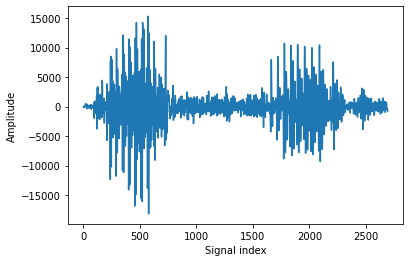

Process file: data/apple/apple01.wav, Predicted: apple, Score: -1387.3199


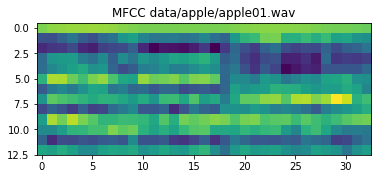

In [15]:
testing('data/apple/apple01.wav')

$\color{red}{\text{Q1. Complete following code to perform HMM-based audio recognition.}}$

Tasks
- Apply the pre-trained HMM model to perform audio recognition
- Evaluate the audio recognition performance by changing HMM model configuration

Reference
- HMMLearn, https://hmmlearn.readthedocs.io/en/latest/tutorial.html
- Python_speech_features,
https://python-speech-features.readthedocs.io/en/latest/

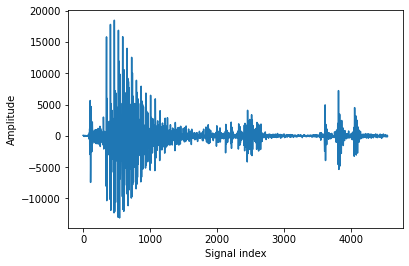

Process file: data/pineapple/pineapple15.wav, Predicted: pineapple, Score: -2560.0186


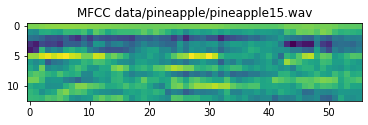

In [16]:
# Apply HMM model with n_components=4 and covariance_type='diag'

testing('data/pineapple/pineapple15.wav')

In [17]:
# Build an HMM model with n_components=3 and covariance_type='full'

hmm_models = []
# Parse the input directory
for dirname in os.listdir(input_folder):
    # Get the name of the subfolder 
    subfolder = input_folder + '/' + dirname

    # Extract the class label
    label = dirname

    # Initialize variables
    X = np.array([])
    y_words = []

    # Iterate through the audio files (leaving 1 file for testing in each class)
    for filename in os.listdir(subfolder):
        if not filename.endswith('.wav'):
            continue
        # Read the input file
        filepath = subfolder + '/' + filename
        print("Process the file: %s" % filepath)
        sampling_freq, audio = wavfile.read(filepath)
            
        # Extract MFCC features
        mfcc_features = mfcc(audio, sampling_freq)

        # Append to the variable X
        if len(X) == 0:
            X = mfcc_features
        else:
            X = np.append(X, mfcc_features, axis=0)
            
    # Append the label
    y_words.append(label)

    # Train and save HMM model
    hmm_trainer = HMMTrainer(n_components=3, cov_type="full")
    hmm_trainer.train(X)
    hmm_models.append((hmm_trainer, label))
    hmm_trainer = None

Process the file: data/banana/banana09.wav
Process the file: data/banana/banana12.wav
Process the file: data/banana/banana04.wav
Process the file: data/banana/banana02.wav
Process the file: data/banana/banana07.wav
Process the file: data/banana/banana14.wav
Process the file: data/banana/banana15.wav
Process the file: data/banana/banana03.wav
Process the file: data/banana/banana06.wav
Process the file: data/banana/banana13.wav
Process the file: data/banana/banana11.wav
Process the file: data/banana/banana08.wav
Process the file: data/banana/banana10.wav
Process the file: data/banana/banana01.wav
Process the file: data/banana/banana05.wav
Process the file: data/apple/apple12.wav
Process the file: data/apple/apple02.wav
Process the file: data/apple/apple10.wav
Process the file: data/apple/apple05.wav
Process the file: data/apple/apple04.wav
Process the file: data/apple/apple07.wav
Process the file: data/apple/apple08.wav
Process the file: data/apple/apple11.wav
Process the file: data/appl

In [19]:
# Display the state transition probability matrix of the HMM model

hmm_model, label = hmm_models[0]
hmm_model.display_info()

transmat_ [[0.88689978 0.0862162  0.02688402]
 [0.05562099 0.86838169 0.07599732]
 [0.00598177 0.06802711 0.92599112]]
n_features 13


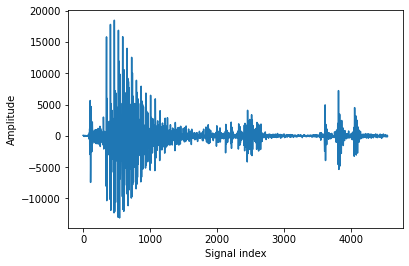

Process file: data/pineapple/pineapple15.wav, Predicted: pineapple, Score: -2486.2582


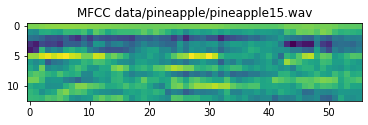

In [18]:
# Apply HMM model with n_components=3 and covariance_type='full'


testing('data/pineapple/pineapple15.wav')

$\color{red}{\text{Q2. What is strength and limitation of the HMM-based speech recognition system (single word command recognition) developed in this workshop?}}$

In [ ]:
# Provide your answer to Question 2 here

# Strength
# 1. This technique is fast because there are lesser no. of trainable parameters unlike Neural Networks which have huge no. of trainable parameters.
# 2. High accuracy in recognizing single word command because there are 7 models and each model needs to check only one word.

# Limitation
# 1. It will fail to detect any word which is not among these 7 words.
# 2. This technique is not efficient. We are creating a separate model for each word/class.

**Once you finish your workshop, rename your .ipynb file to your name, and submit your .ipynb file into LumiNUS.**

Have a nice day!